## A step-by-step guide to Data Visualizations in Python

Follow along with [this article](https://medium.com/codex/step-by-step-guide-to-data-visualizations-in-python-b322129a1540).  We will be using [this .xlsx dataset](https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset) from Kaggle on Immigration to Canada from 1980–2013. No need to dowload it, it is already in the git repositroy you forked.<br>

#### We suggest that instead of copy and pasting the code, you type it out.  This will help you become more familiar with the syntex and better understand it.


### Step-1: Importing Packages

In [1]:
#import all librarys and modules needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

### Step-2 : Importing and Cleaning Data 

In [2]:
#import and clean data, remember path is data/Canada.xlsx
canadia = pd.read_excel("C:\\Users\\Khazbin\\Desktop\\Data Analysis\\DataVisualizationPython-main\\Data\\Canada.xlsx",1, skiprows = range(20), skipfooter = 2)

canadia.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)
canadia.rename(columns = {'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace = True)
canadia['total'] = canadia.sum(axis = 1)
canadia = canadia.set_index('Country')
canadia.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace = True)
canadia.columns = canadia.columns.astype(str)

# Useful for upcoming visualizations
years = list(map(str, range(1980,2013)))

C:\Users\Khazbin\AppData\Local\Temp\ipykernel_1128\2450257718.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  canadia['total'] = canadia.sum(axis = 1)


### Step-3 : Creating Beautiful Visualizations

#### Line Chart

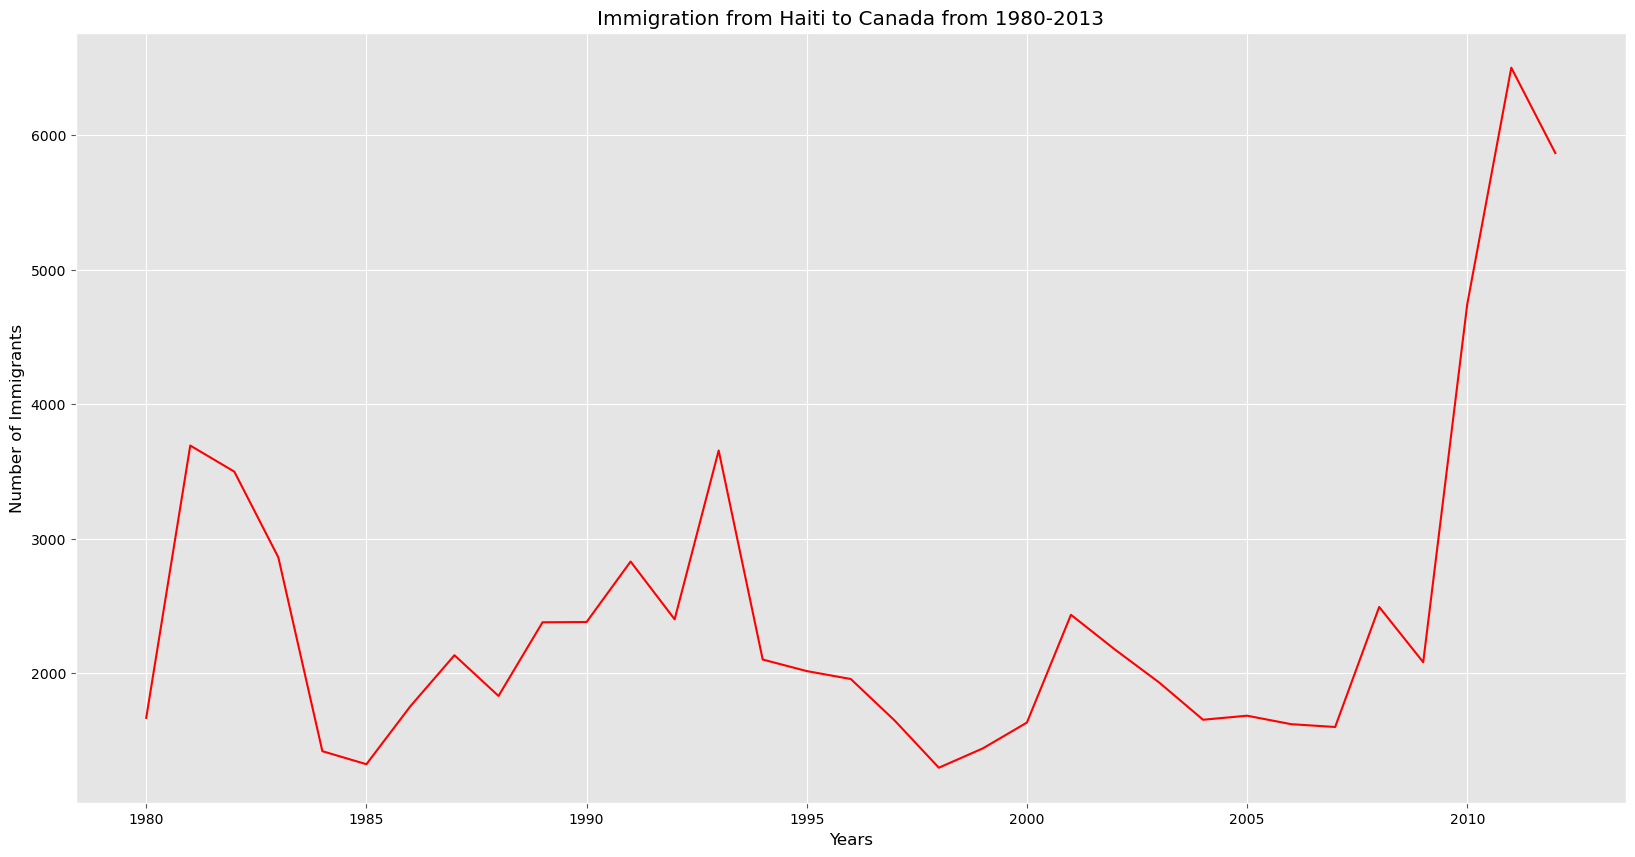

In [3]:
# Single line chart
fig1 = canadia.loc['Haiti', years].plot(kind = 'line', color = 'r')
plt.title('Immigration from Haiti to Canada from 1980-2013',color = 'black')
plt.xlabel('Years',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('linechart_single.png')

plt.show()

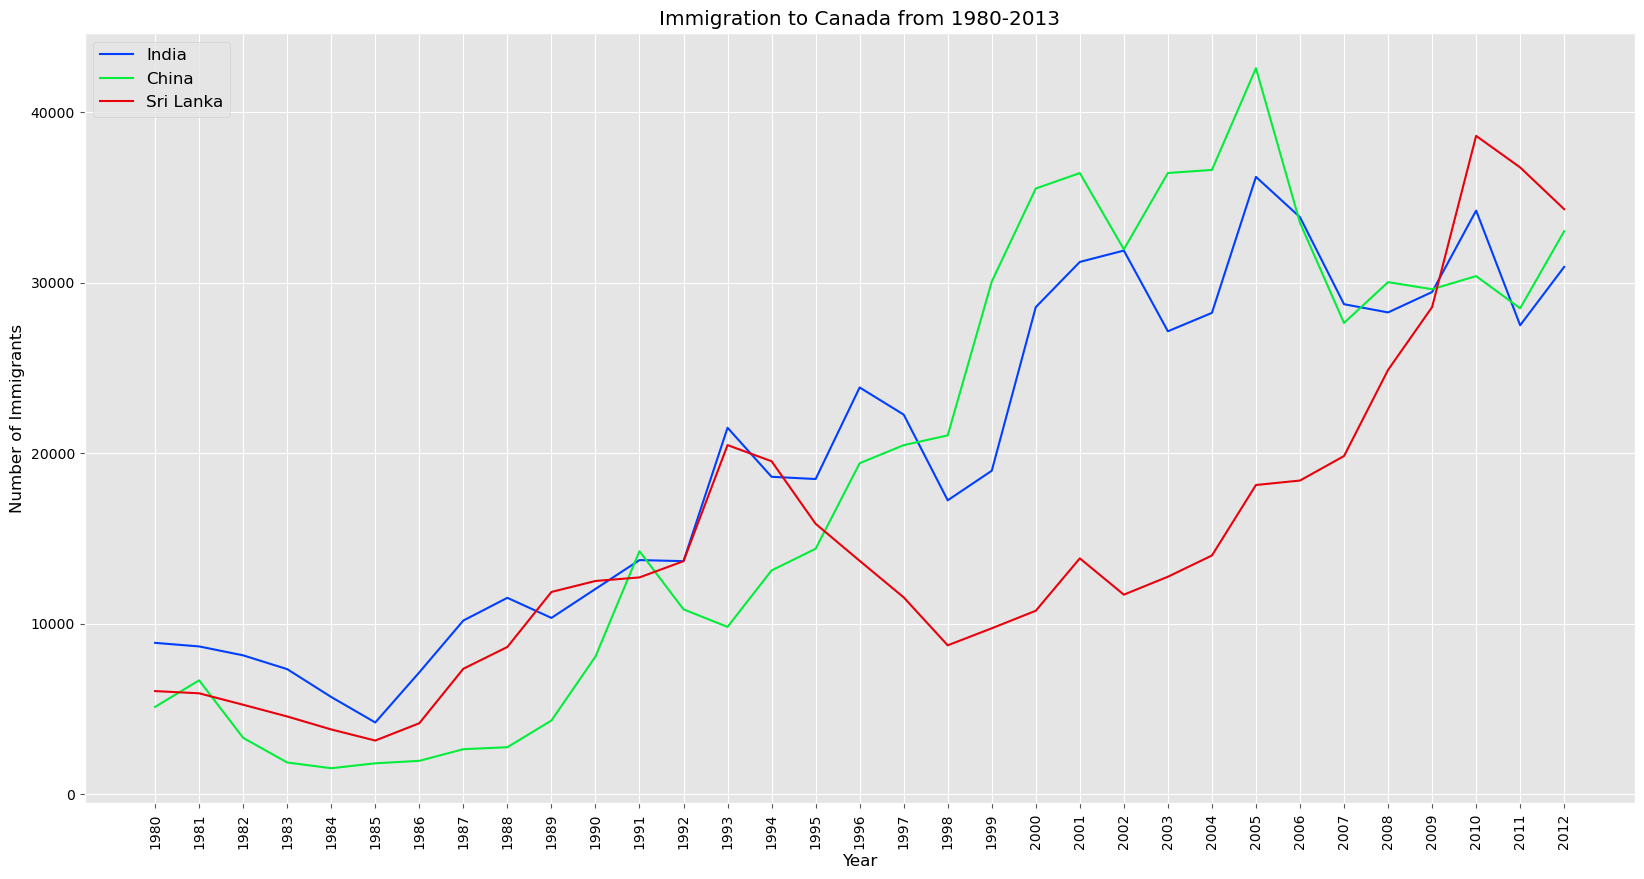

In [4]:
# Multiple Line chart 
plt.style.use('seaborn-v0_8-bright')
fig2 = plt.plot(canadia.loc['India',years], label = 'India')
plt.plot(canadia.loc['China',years], label = 'China')
plt.plot(canadia.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 12)
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')
plt.title('Immigration to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.savefig('linechart_multiple.png')

plt.show()

#### Lets talk about style   

In [ ]:
#Shows all avaiable built-in styles
print(plt.style.available)

To see a visualization of the aviable style sheets [click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). 

Syntex to select a specific style is: plt.style.use('style_name') 

Try it out by adding the line of code to the top of the code block above and choose one of the preinstalled styles. Which style is your favorite?<br><br>

Most of them seem fine, but I guess I like seaborn-v0_8-dark the best.<br><br>

What happens when you change the line- plt.legend(loc = 'upper left', fontsize = 12) to plt.legend(loc = 'lower right', fontsize = 12)? <br><br>

That changes the location of the legend from the upper left corner to the lower right corner.<br><br>

Experiment changing other lines of the code and see how the graph changes. Add any notes or observations here. Going forward feel free to experiment with each graph type<br><br><br><br><br><br>

#### Install mplcyberpunk
Open a terminal window and at at the prompt type:

python -V

If its python 3.something, copy and paste: pip install mplcyberpunk
If its python 2.something, copy and paste: pip3 install mplcyberpunk


For more info on mplcyberpunk click [here.](https://github.com/dhaitz/mplcyberpunk)

In [ ]:
pip install mplcyberpunk

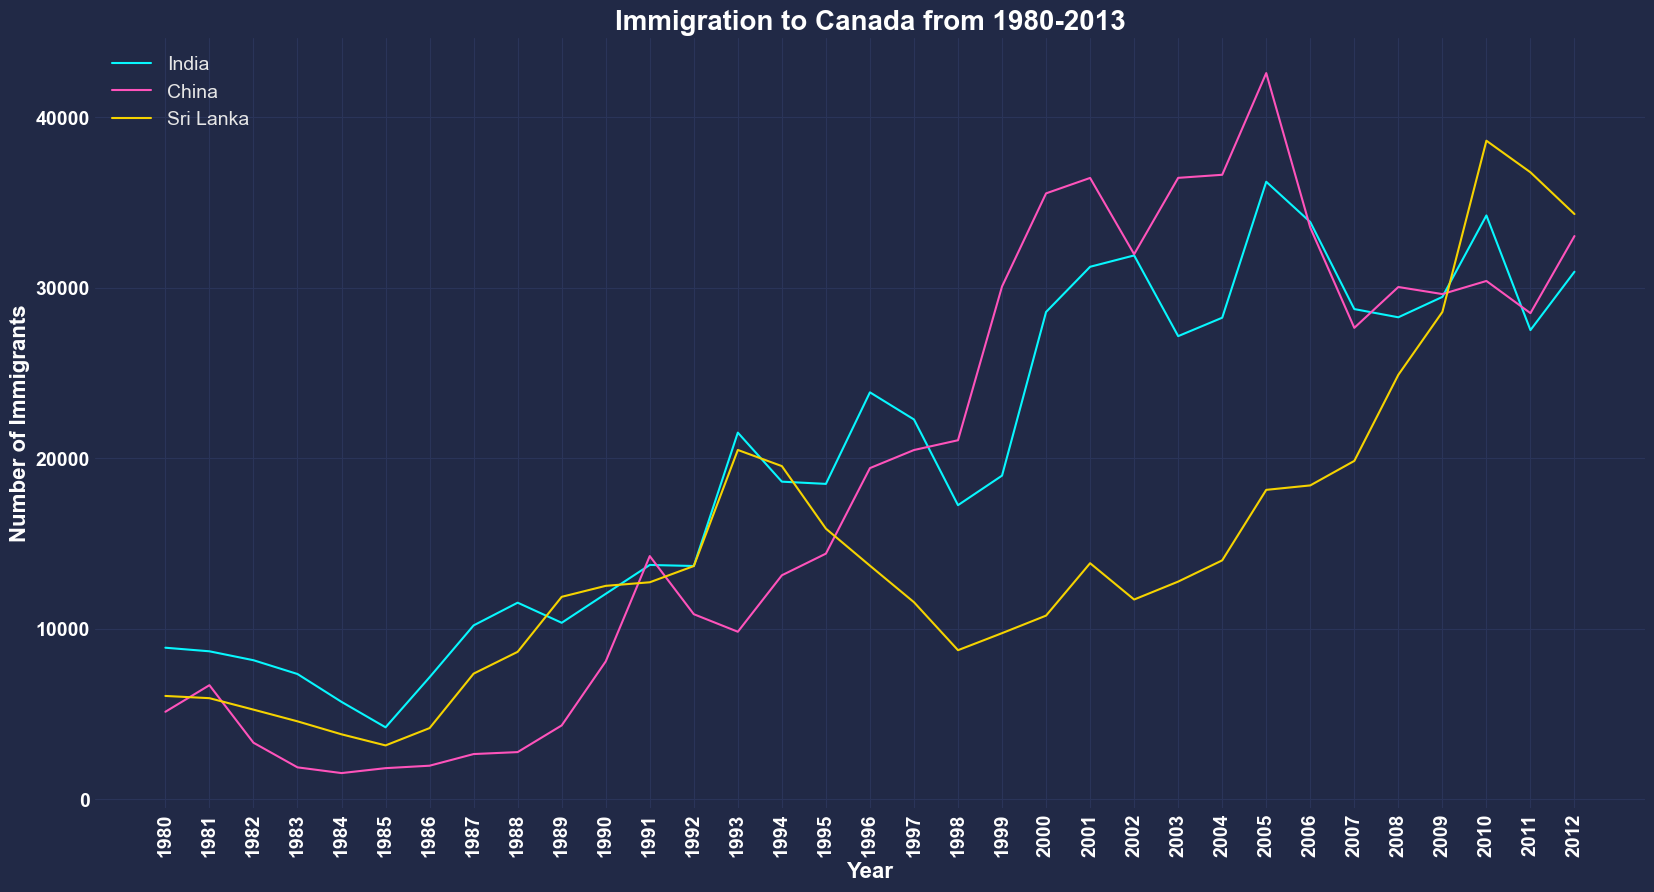

In [5]:
# Cyberpunk Multiple Line Chart
import mplcyberpunk
style.use('cyberpunk')

plt.plot(canadia.loc['India',years], label = 'India')
plt.plot(canadia.loc['China',years], label = 'China')
plt.plot(canadia.loc['Philippines',years], label = 'Sri Lanka')
plt.legend(loc = 'upper left', fontsize = 14)
plt.xticks(rotation = 90, color = 'white', fontsize = 14, fontweight = 'bold')
plt.yticks(color = 'white', fontsize = 14, fontweight = 'bold')
plt.title('Immigration to Canada from 1980-2013',color = 'white', fontsize = 20, fontweight = 'bold')
plt.xlabel('Year',color = 'white', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Immigrants',color = 'white',fontsize = 16, fontweight = 'bold')
plt.savefig('cyber_line.png')

plt.show()

#### Bar Chart

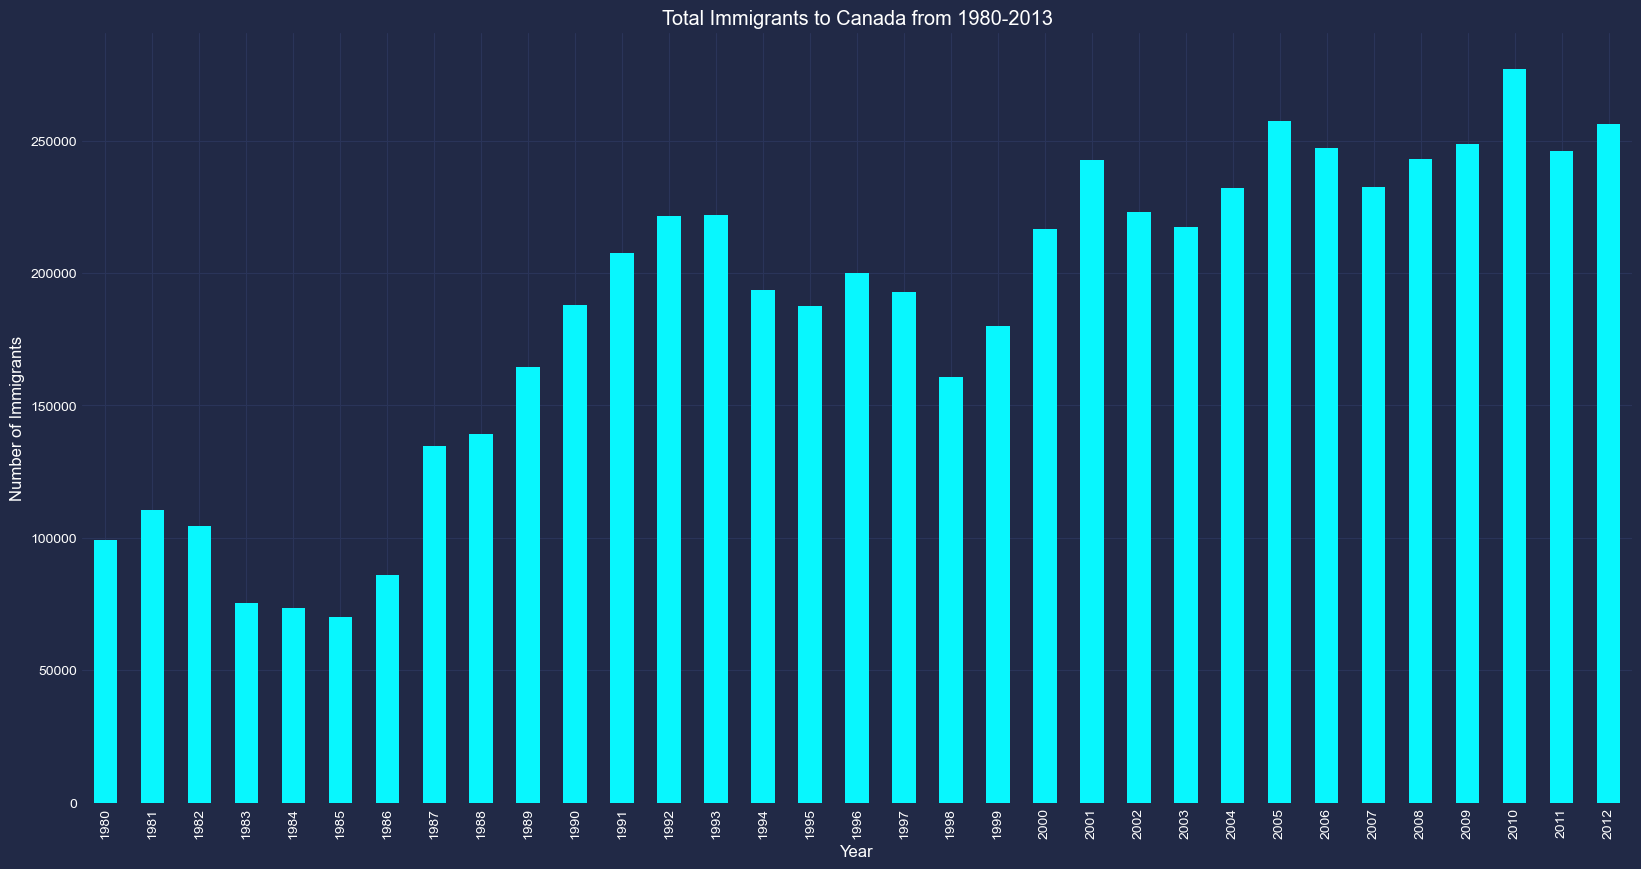

In [7]:
# Vertical bar chart
# Do not change the style back to ggplot 
# delete the style.use('ggplot') line of code

canadiaTotal = pd.DataFrame(canadia.loc[:,years].sum())
canadiaTotal.rename(columns = {0:'total'}, inplace = True)

canadiaTotal.plot(kind = 'bar', legend = False)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'white')
plt.xticks(color = 'white')
plt.yticks(color = 'white')
plt.xlabel('Year',color = 'white')
plt.ylabel('Number of Immigrants',color = 'white')
plt.savefig('bar_vertical.png')

plt.show()

Notice that style is still set to cyberpunk.  How do we fix it so we can see the labels?<br> <br>

Answer: change the color = 'black' to 'white'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

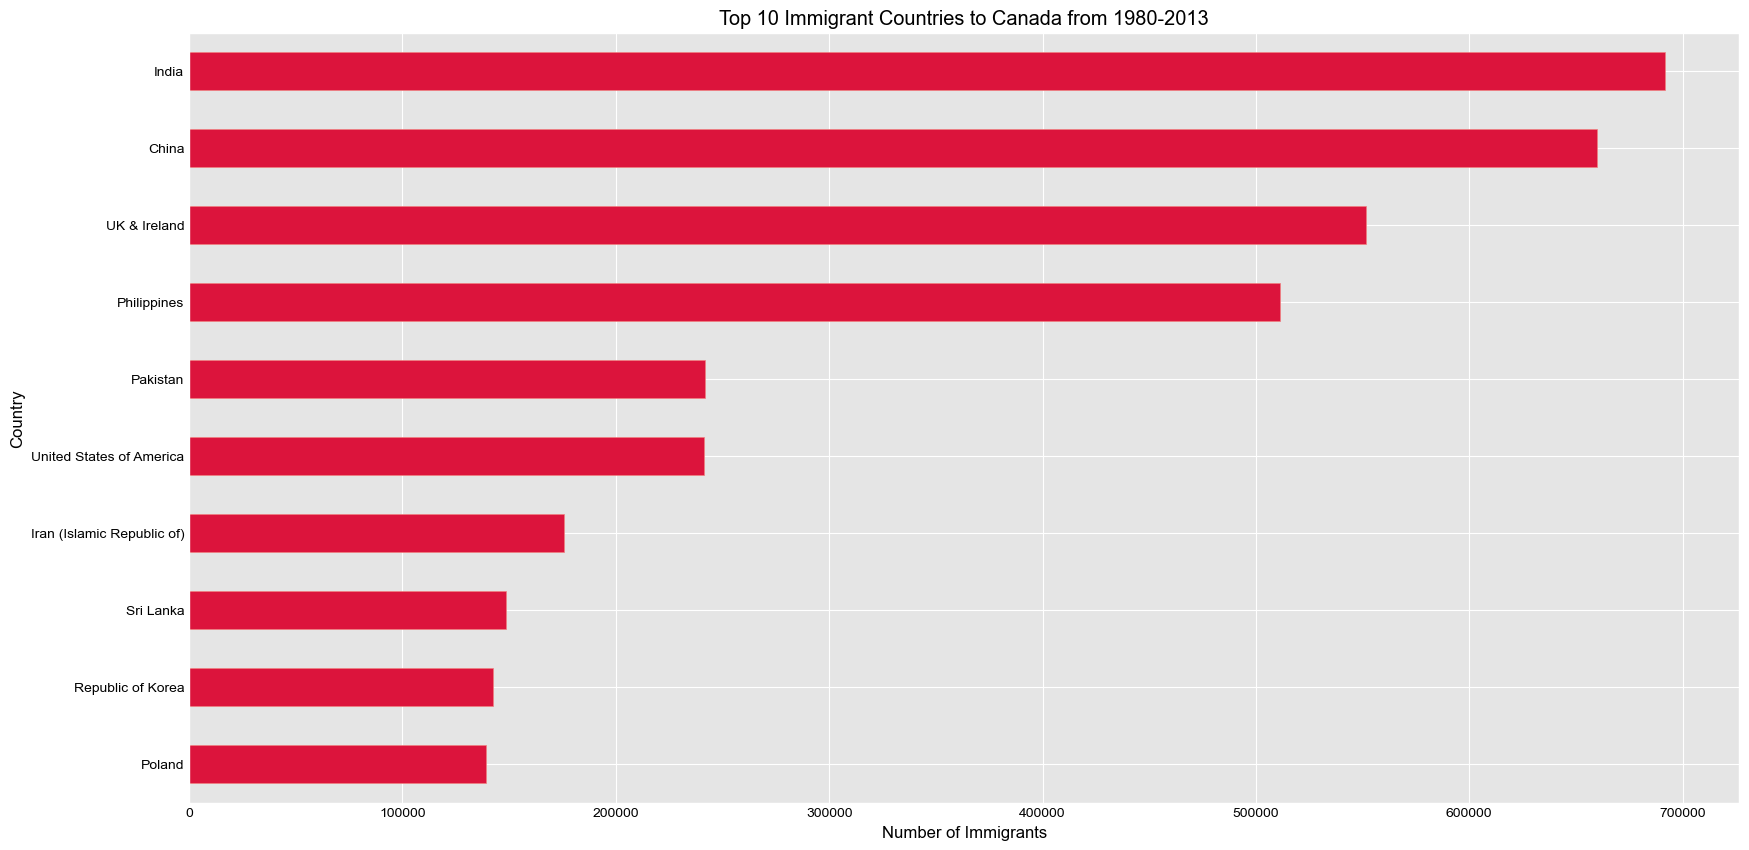

In [8]:
# Horizontal bar chart
#change style back to ggplt
style.use('ggplot')

canadiaTop10 = pd.DataFrame(canadia.nlargest(10,'total')['total'].sort_values(ascending = True))

canadiaTop10.plot.barh(legend = False, color = 'crimson', edgecolor = 'lightcoral')
plt.title('Top 10 Immigrant Countries to Canada from 1980-2013',color = 'black')
plt.xlabel('Number of Immigrants',color = 'black')
plt.ylabel('Country',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('bar_horizontal.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

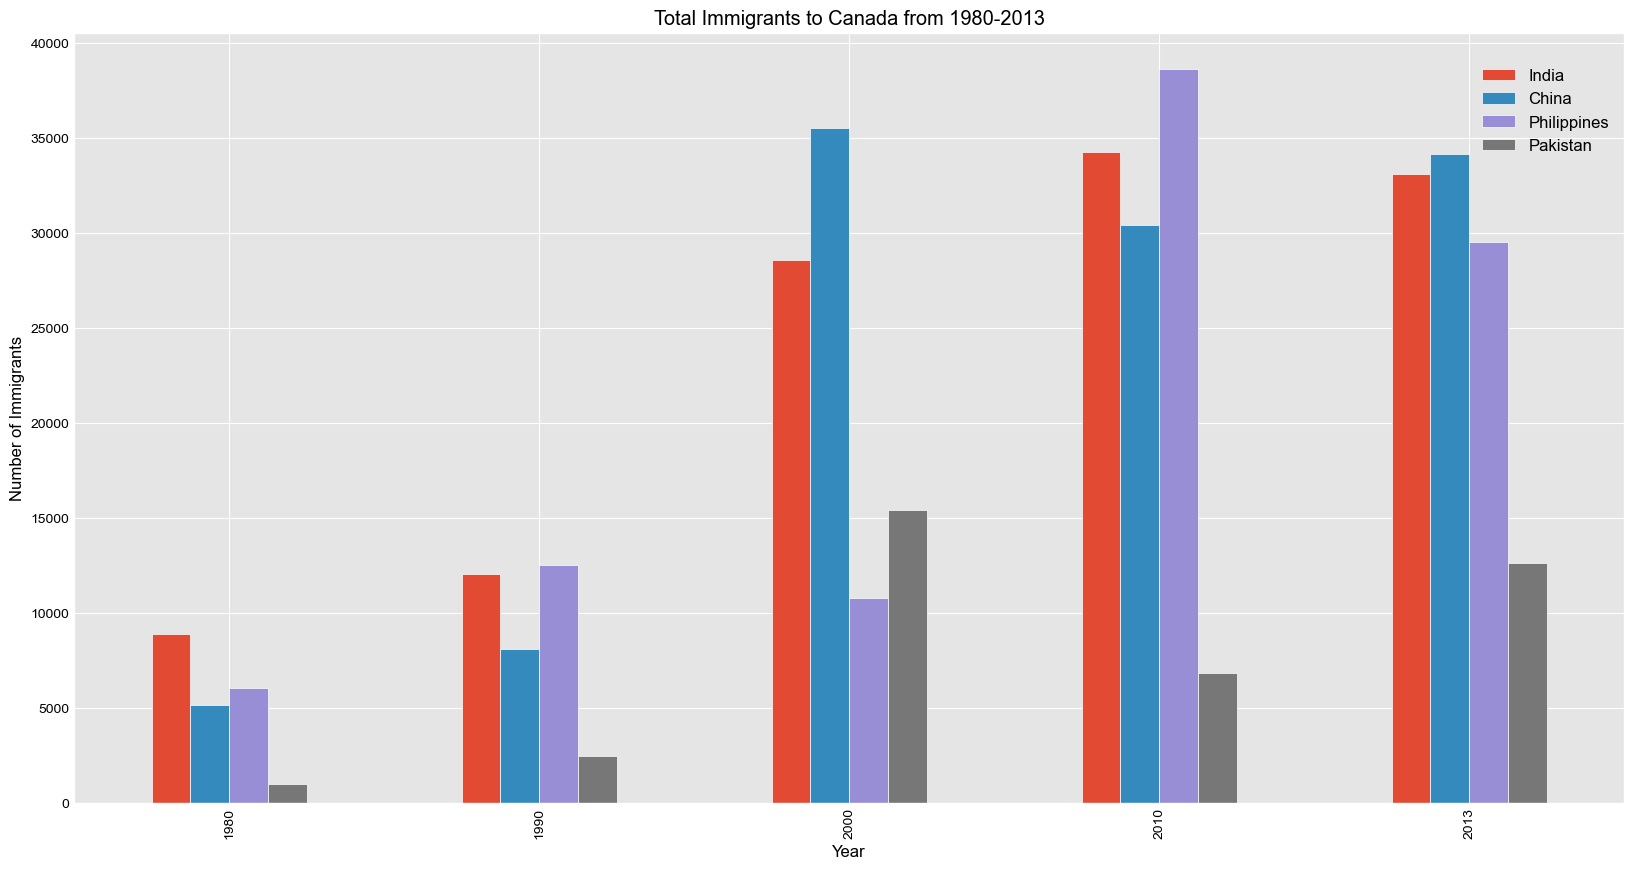

In [10]:
# Grouped bar chart
yearInt10 = list(map(str, (1980,1990,2000,2010, 2013)))
canadiaGroup = pd.DataFrame(canadia.loc[['India','China','Philippines','Pakistan'],yearInt10].T)

canadiaGroup.plot.bar(edgecolor = 'white')
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(title = 'Country', fontsize = 12,labelcolor="black")
plt.savefig('bar_grouped.png')

plt.show()

Notice how the labels in the legend have disapeared?  We can fix this by adding labelcolor='k' to plt.legend<br>
<br>plt.legend(title = 'Country', fontsize = 12, labelcolor='black')



Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Area Chart

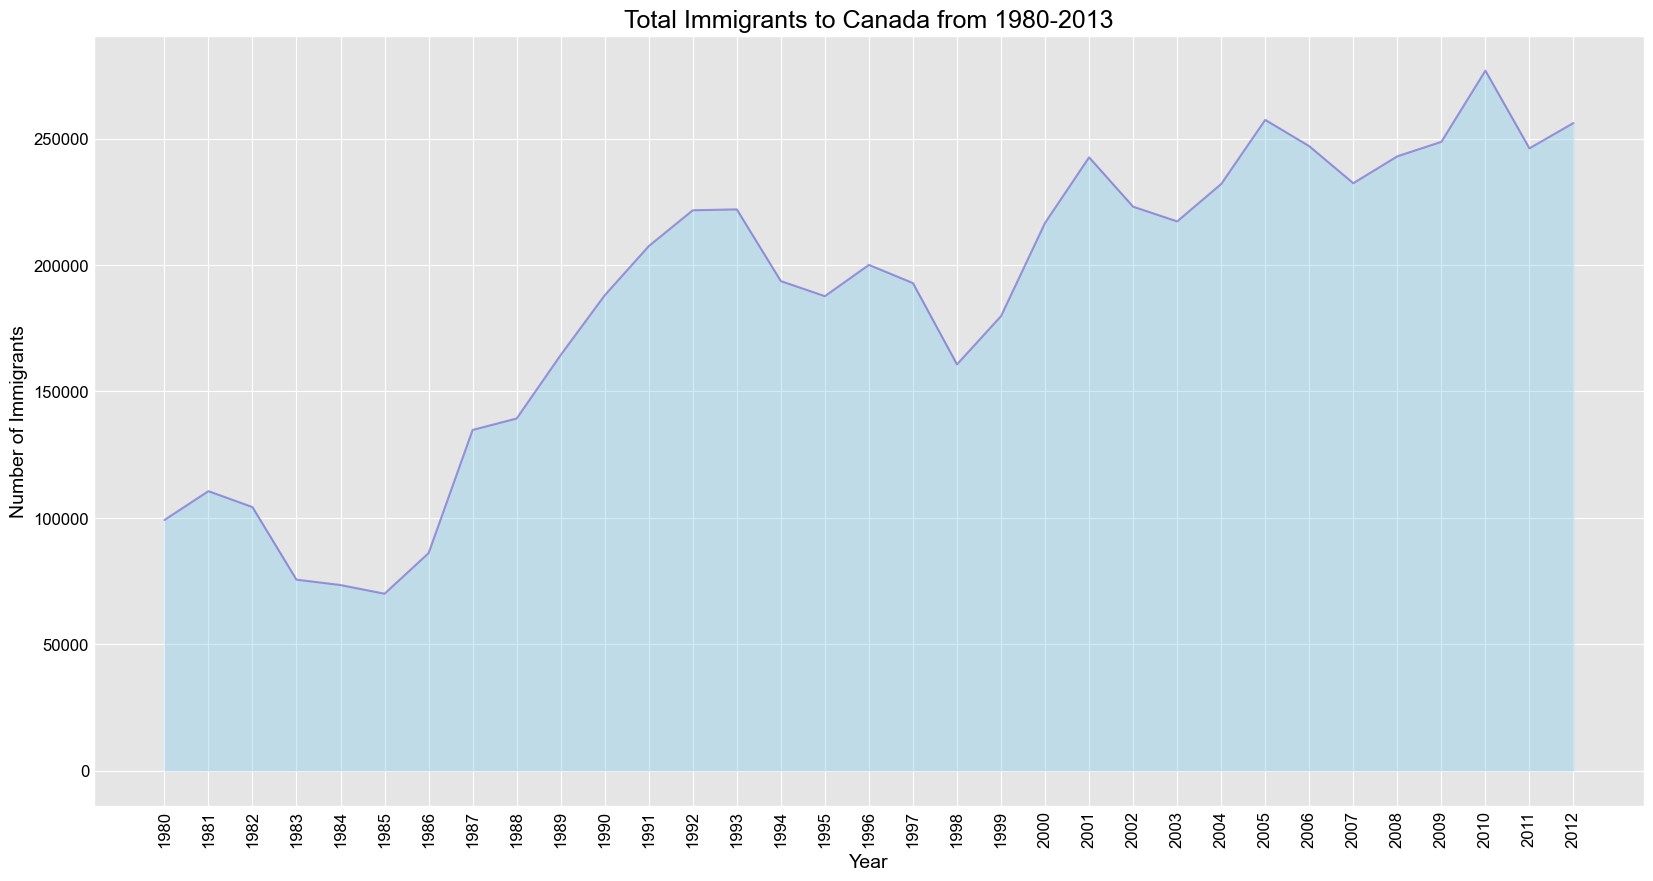

In [11]:
# Area Chart
plt.fill_between(canadiaTotal.index, canadiaTotal['total'], color="skyblue", alpha=0.4)
plt.plot(canadiaTotal.index, canadiaTotal['total'], color = 'Slateblue', alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 18, color = 'black')
plt.yticks(fontsize = 12, color = 'black')
plt.xticks(fontsize = 12, rotation = 90, color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Number of Immigrants', fontsize = 14, color = 'black')
plt.savefig('area_simple.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

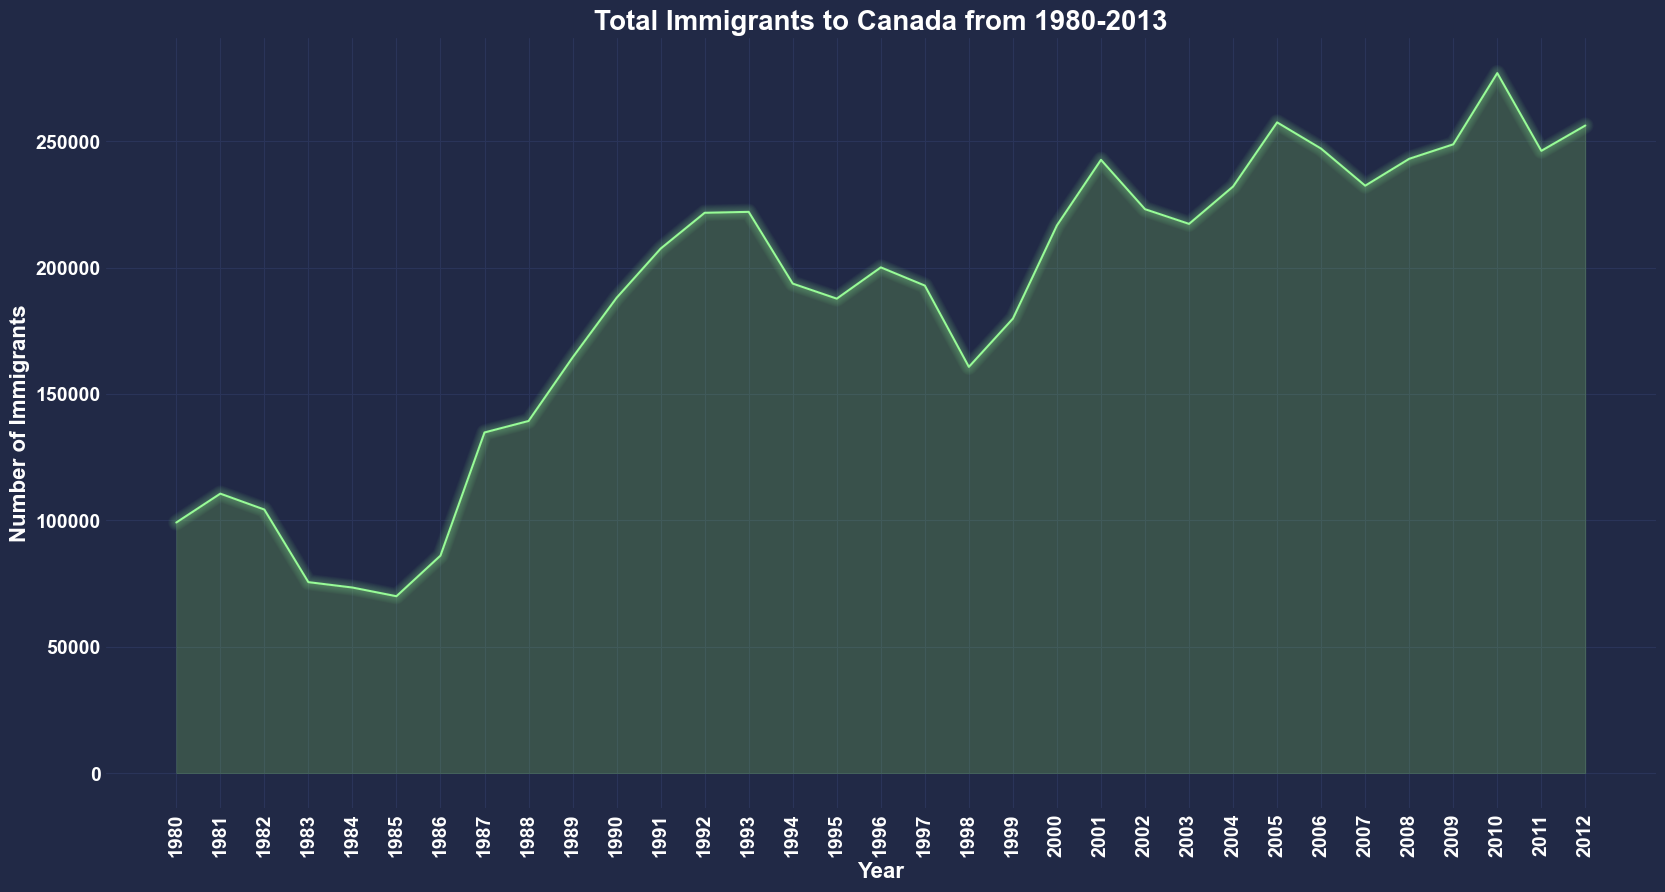

In [12]:
# cyberpunk simple area chart
style.use('cyberpunk')

plt.fill_between(canadiaTotal.index, canadiaTotal['total'], color = 'greenyellow', alpha = 0.1)
plt.plot(canadiaTotal.index, canadiaTotal['total'], color = 'palegreen', alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to Canada from 1980-2013', fontsize = 20,fontweight = 'bold', color = 'white')
plt.yticks(fontsize = 14, color = 'white',fontweight = 'bold')
plt.xticks(fontsize = 14, rotation = 90, color = 'white',fontweight = 'bold')
plt.xlabel('Year', fontsize = 16, color = 'white',fontweight = 'bold')
plt.ylabel('Number of Immigrants', fontsize = 16, color = 'white',fontweight = 'bold')
plt.savefig('cyber_area_simple.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

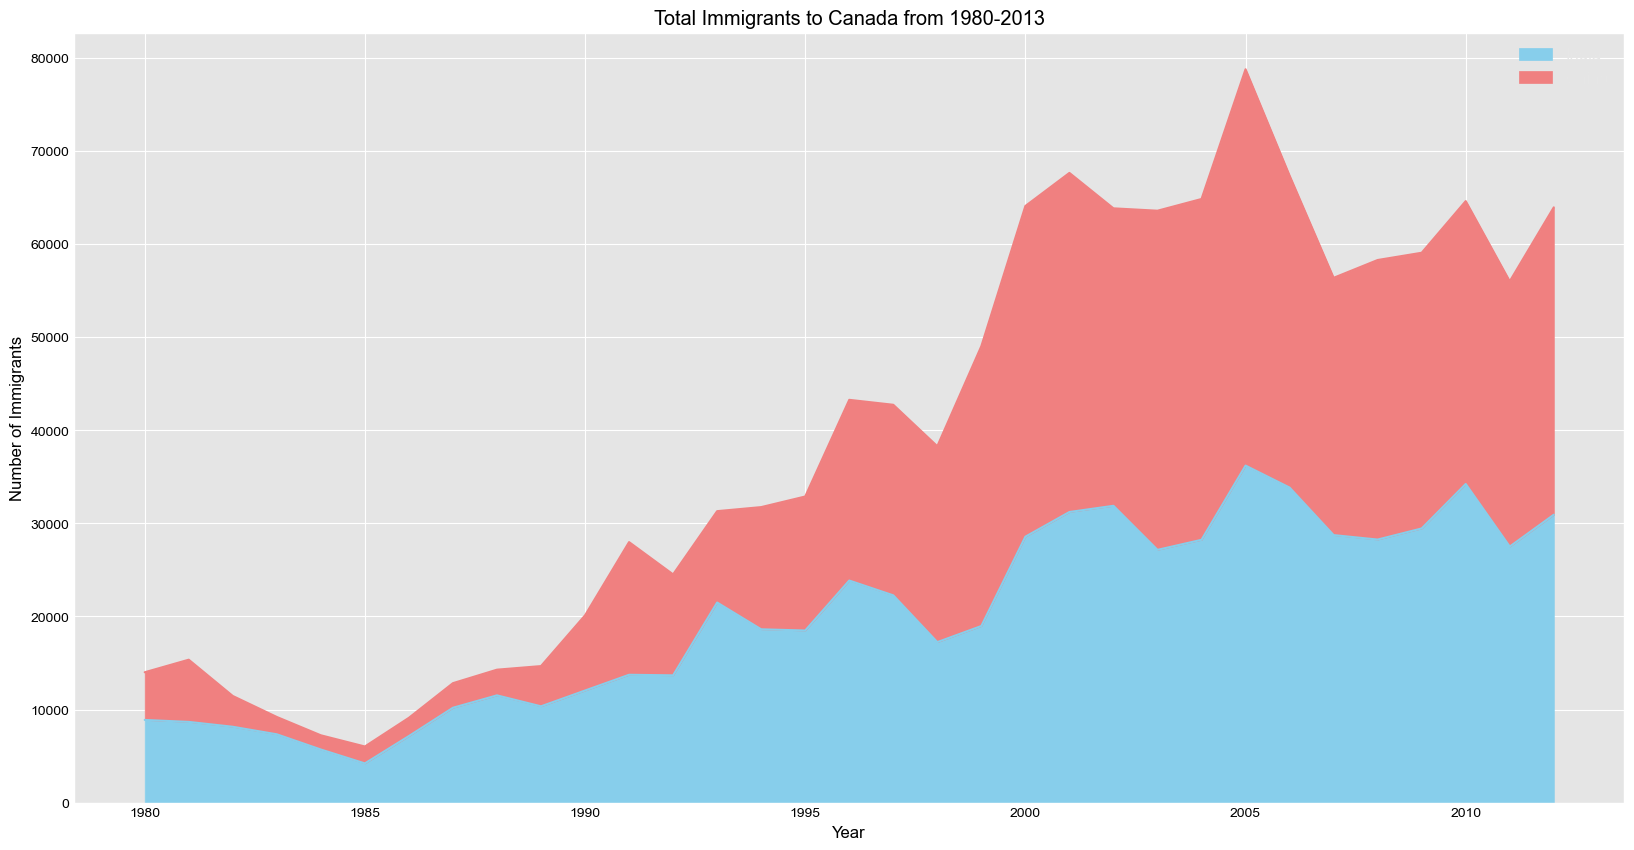

In [16]:
# stacked area chart
style.use('ggplot')

color = ['skyblue','lightcoral']
canadiaTop2List = canadia.nlargest(2, 'total').index.tolist()
canadiaTop2 = pd.DataFrame(canadia.loc[canadiaTop2List, years].T)
fig8 = canadiaTop2.plot(kind = 'area', stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.legend(fontsize = 12)
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_stacked.png')
plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

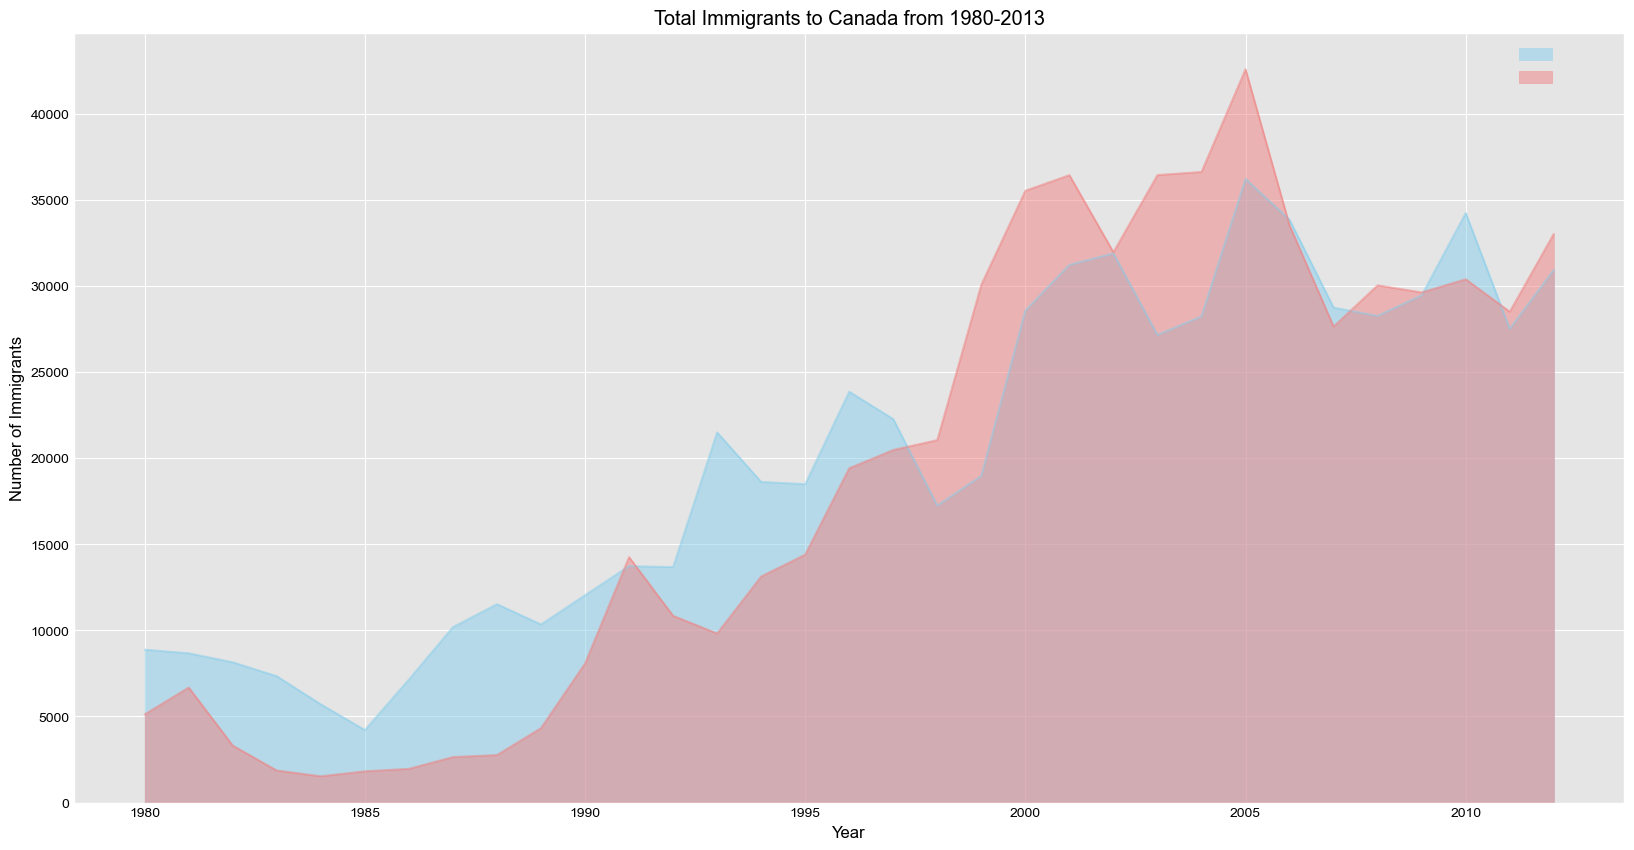

In [17]:
# unstacked area chart
fig9 = canadiaTop2.plot(kind = 'area', stacked = False, color = color)
plt.title('Total Immigrants to Canada from 1980-2013',color = 'black')
plt.xlabel('Year',color = 'black')
plt.ylabel('Number of Immigrants',color = 'black')
plt.legend(fontsize = 12)
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('area_unstacked.png')
plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Box Plot

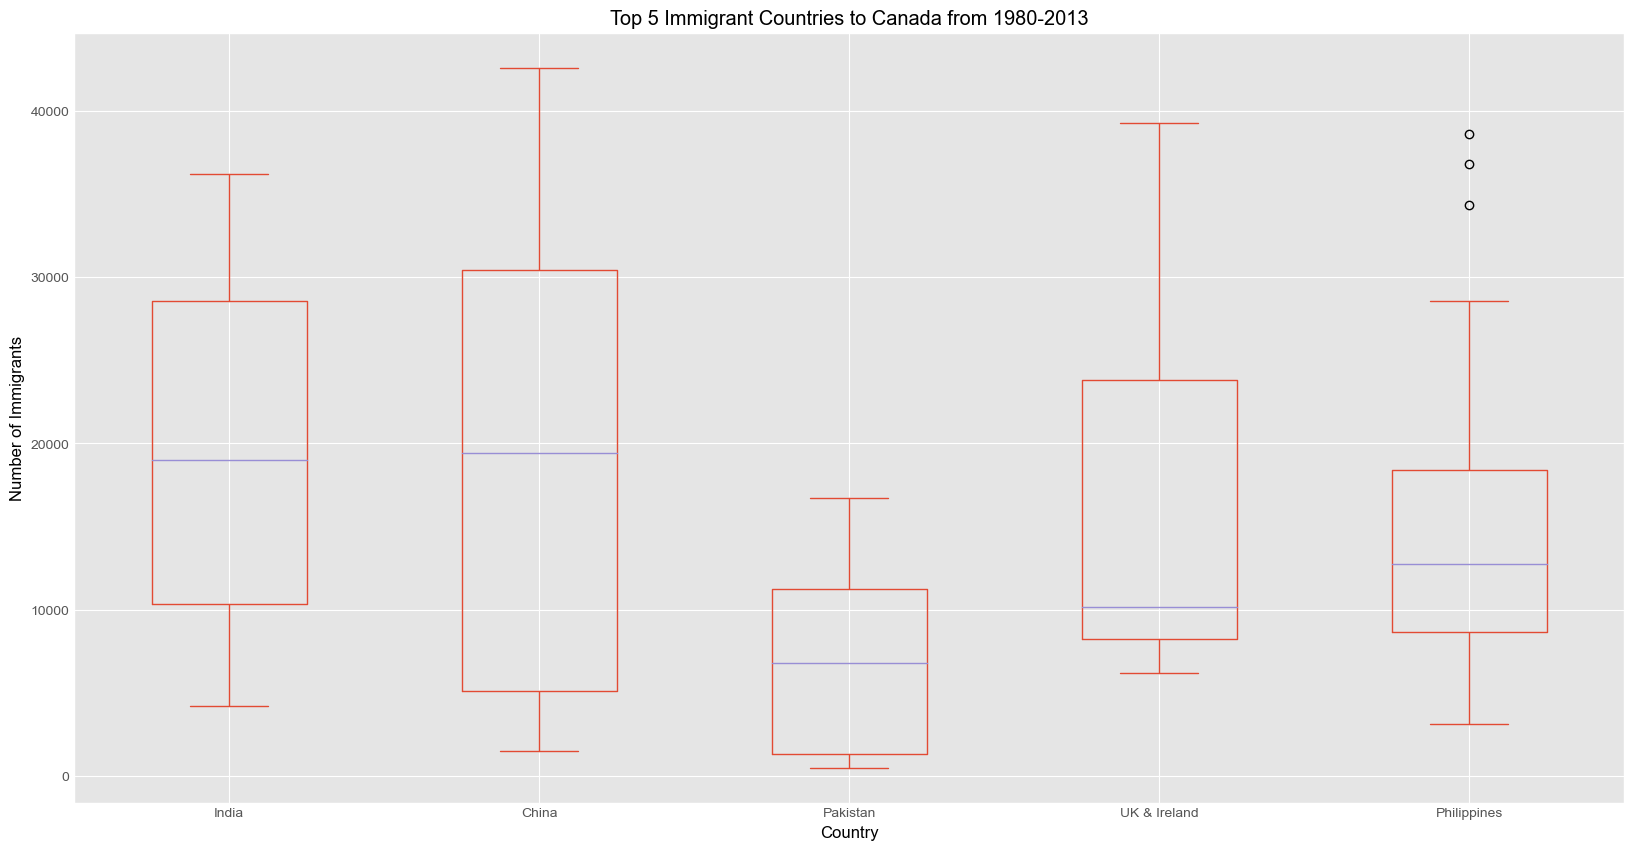

In [18]:
# Vertical Box Plot
canadiaBox = pd.DataFrame(canadia.loc[['India','China','Pakistan','UK & Ireland','Philippines'], years].T)

canadiaBox.plot(kind = 'box')
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.xlabel('Country', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('box_vertical.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

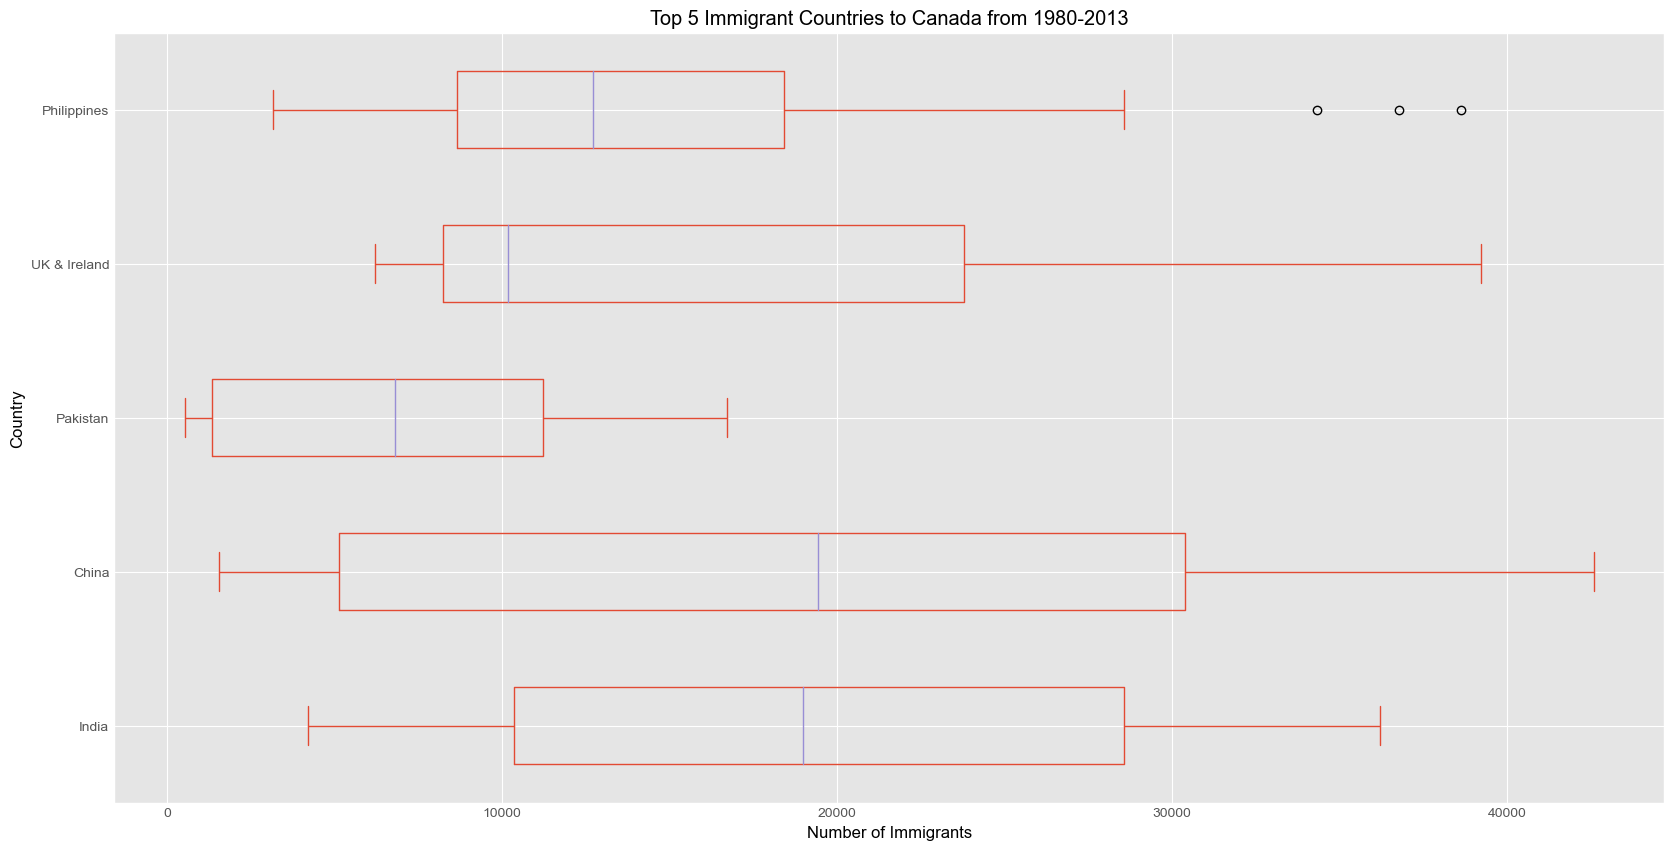

In [19]:
# horizontal box plot
canadiaBox.plot(kind = 'box', vert = False)
plt.title('Top 5 Immigrant Countries to Canada from 1980-2013', color = 'black')
plt.ylabel('Country', color = 'black')
plt.xlabel('Number of Immigrants', color = 'black')
plt.savefig('box_horizontal.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Scatter Plot

With the newist version of Seaborn we have to specify x and y.

example: sb.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df_iris)

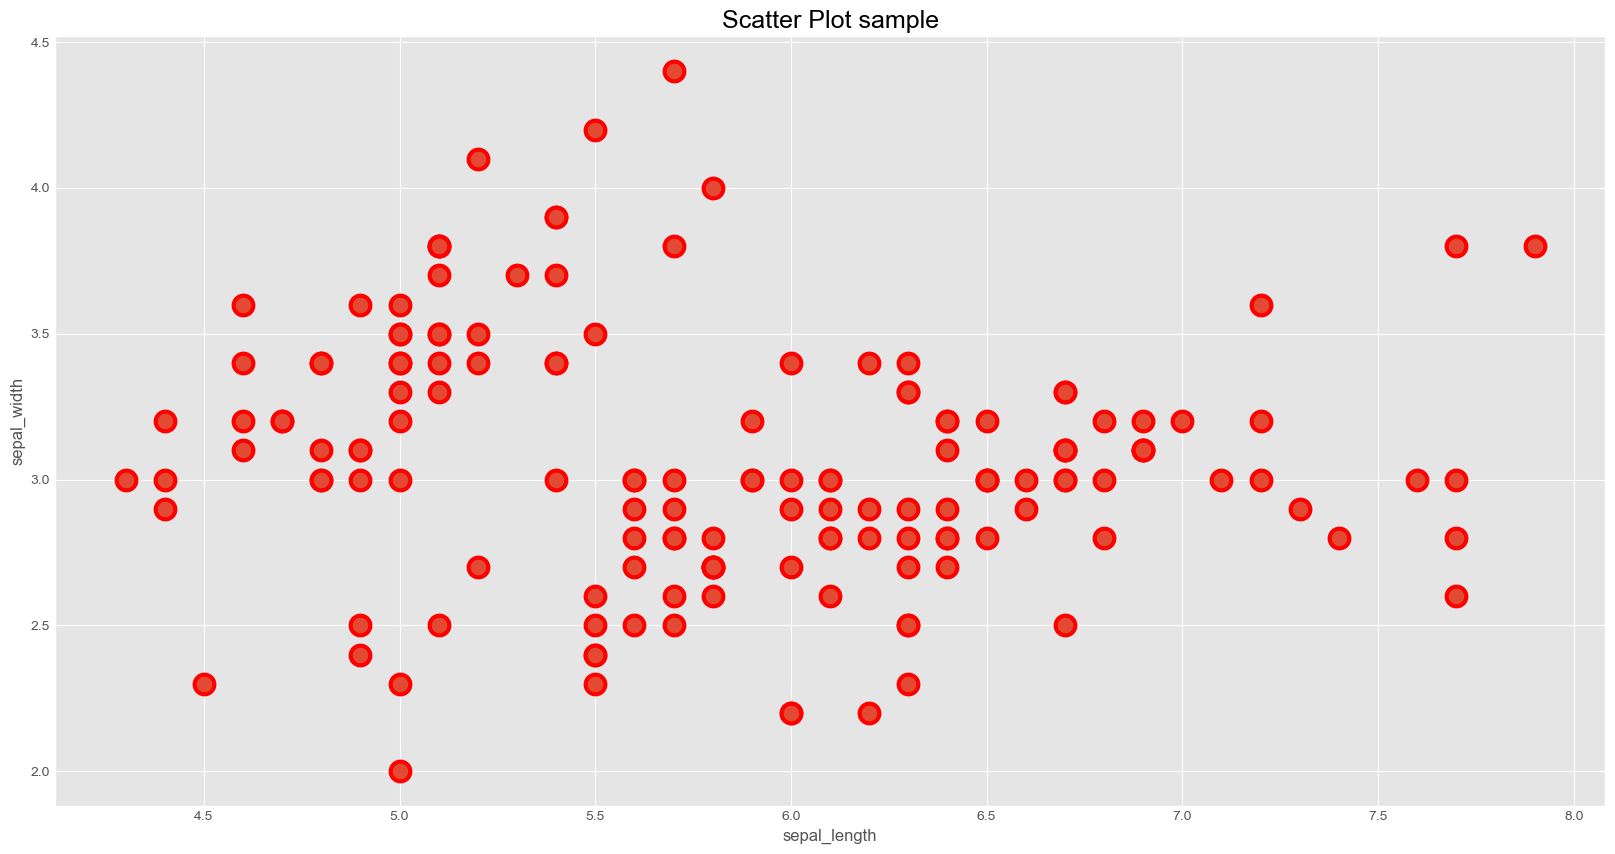

In [20]:
#scatter plot comparing sepal length to sepal width
canadiaIris = sb.load_dataset('iris')

sb.scatterplot(x='sepal_length',y='sepal_width', data = canadiaIris, s = 200, linewidth = 3, edgecolor = 'Red')
plt.title('Scatter Plot sample', color = 'black', fontsize = 18)
plt.savefig('scatter.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Histogram

With the newist version of Seaborn they have deprecated distplot. Replace distplot with histplot and add kde = True

example:
sb.histplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length', kde = True)

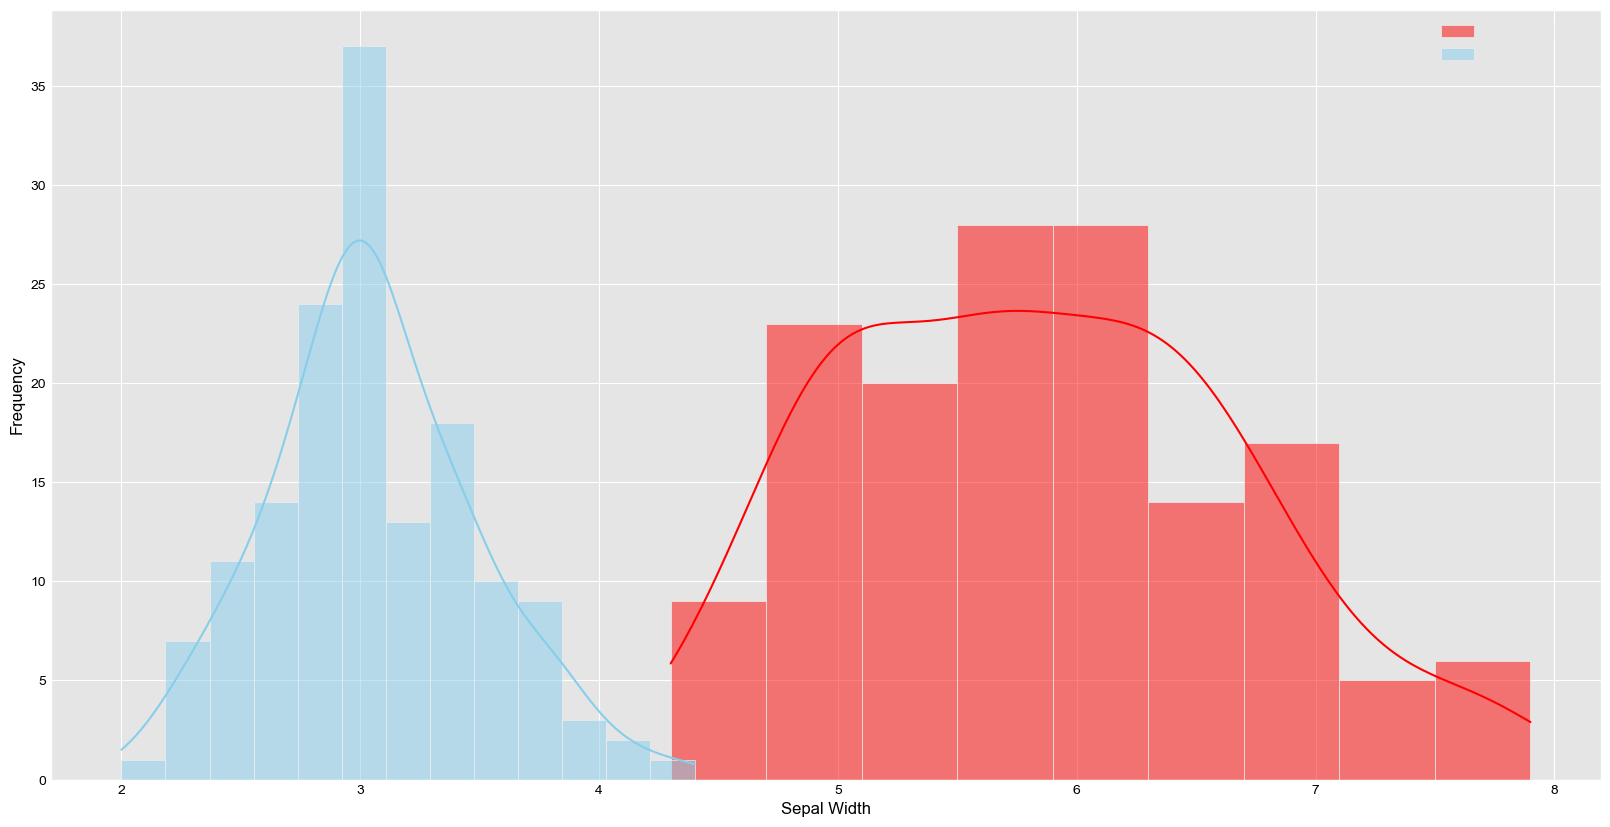

In [21]:
#Histogram side by side, with kde
canadiaIris = sb.load_dataset('iris')

sb.histplot(canadiaIris['sepal_length'], color = 'Red', label = 'Sepal Length',kde=True)
sb.histplot(canadiaIris['sepal_width'], color = 'skyblue', label = 'Sepal Width',kde=True)
plt.legend(fontsize = 12)
plt.xlabel('Sepal Width', color = 'black')
plt.ylabel('Frequency', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('histogram.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Bubble Plot

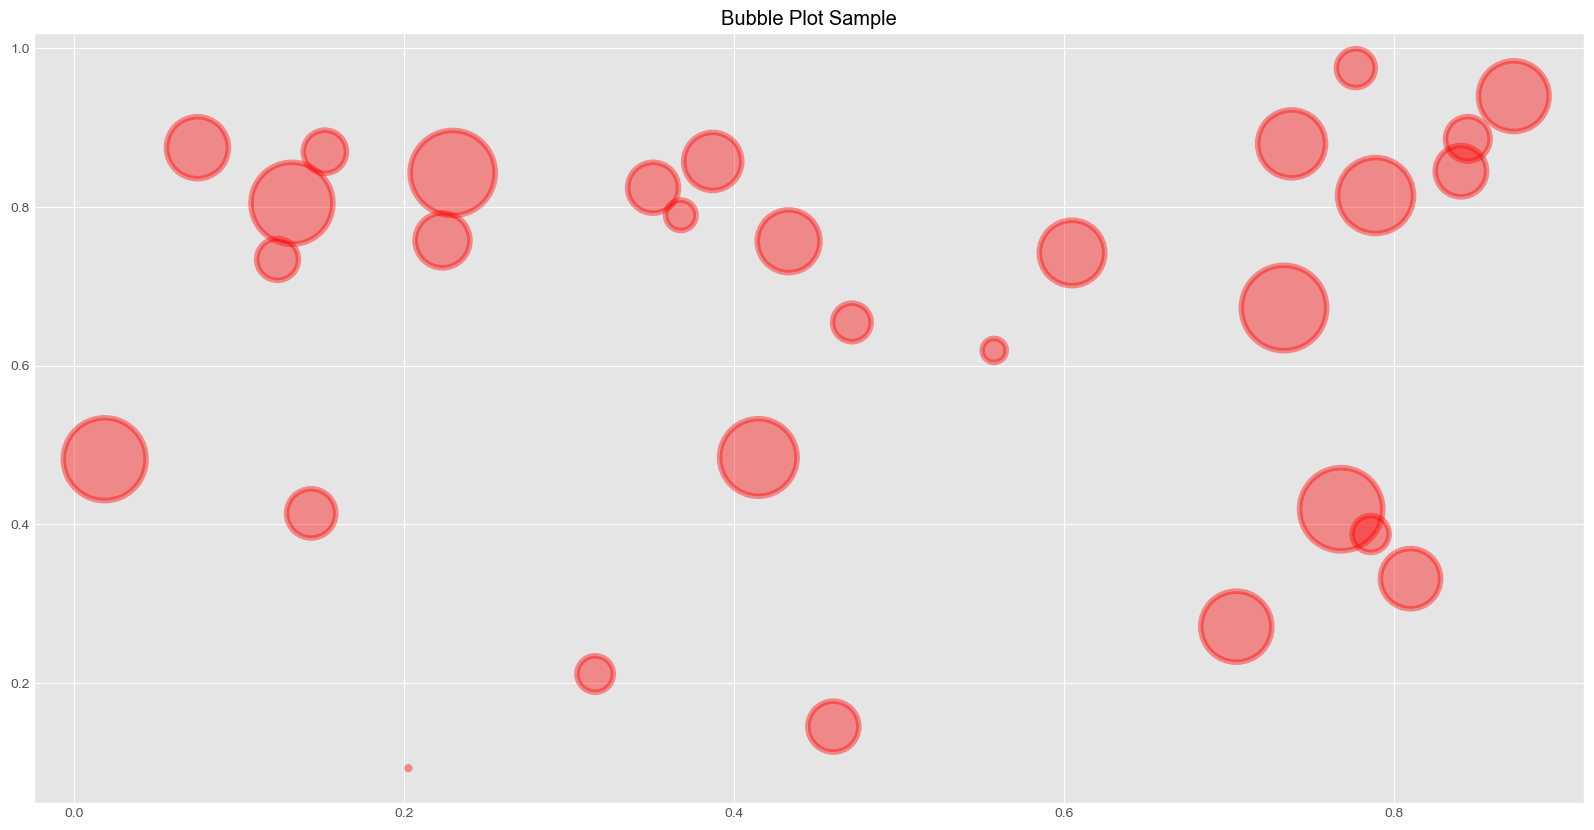

In [22]:
# Bubble Plot
x = np.random.rand(1,30,1)
y = np.random.rand(1,30,1)
size = np.random.rand(1,30,1)

plt.scatter(x,y,s = size*4000, alpha = 0.4, color = 'r', edgecolor = 'Red', linewidth = 4)
plt.title('Bubble Plot Sample', color = 'black')
plt.savefig('bubble.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Pie Chart

Skip this one as the code throws an error. 

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]

plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')

plt.show()

#### Doughnut Chart

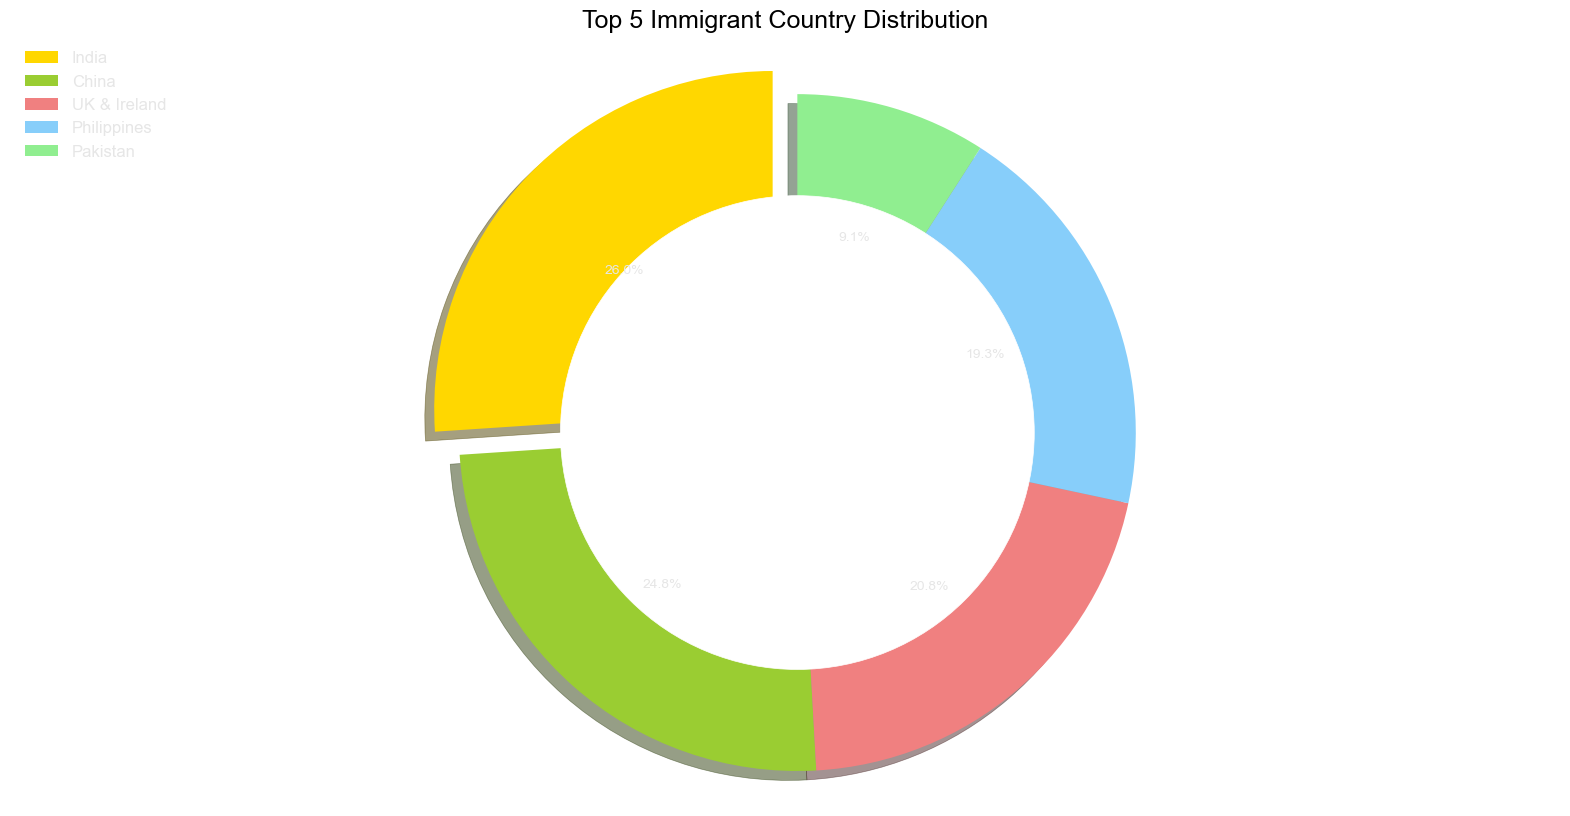

In [24]:
# Doughnut Chart
canadiaTop5List = canadia.nlargest(5, 'total').index.tolist()
canadiaTop5 = pd.DataFrame(canadia.loc[canadiaTop5List, 'total'].T)
circle = plt.Circle( (0,0), 0.7, color='white')
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

plt.pie(canadiaTop5['total'], autopct = '%1.1f%%', shadow = True, explode = [0.1,0,0,0,0], colors = colors, startangle = 90)
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.legend(canadiaTop5.index, fontsize = 12, loc = 'upper left')
plt.title('Top 5 Immigrant Country Distribution', color = 'black', fontsize = 18)
plt.axis('equal')
plt.savefig('doughnut.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Regression Plot

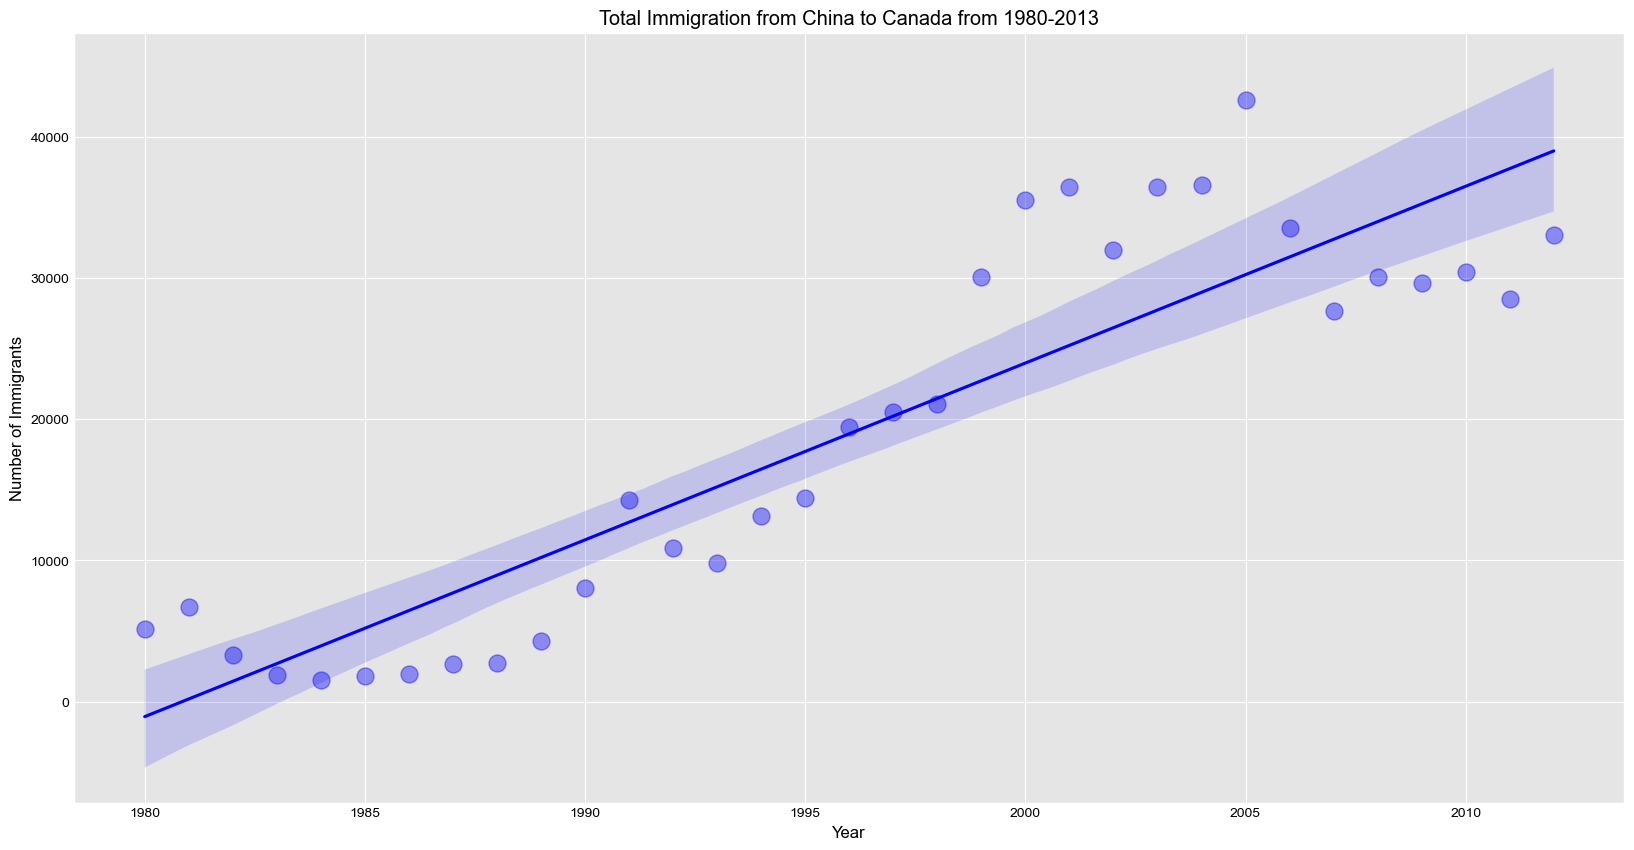

In [26]:
# Strong trend
canadiaReg = pd.DataFrame(canadia.loc['China',years])
canadiaReg.reset_index(inplace = True)
canadiaReg.rename(columns = {'index':'year'}, inplace = True)
canadiaReg[['year','China']] = canadiaReg[['year','China']].astype(int)

sb.regplot(x = 'year', y = 'China', data = canadiaReg, color = 'b', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigration from China to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('reg_strong.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

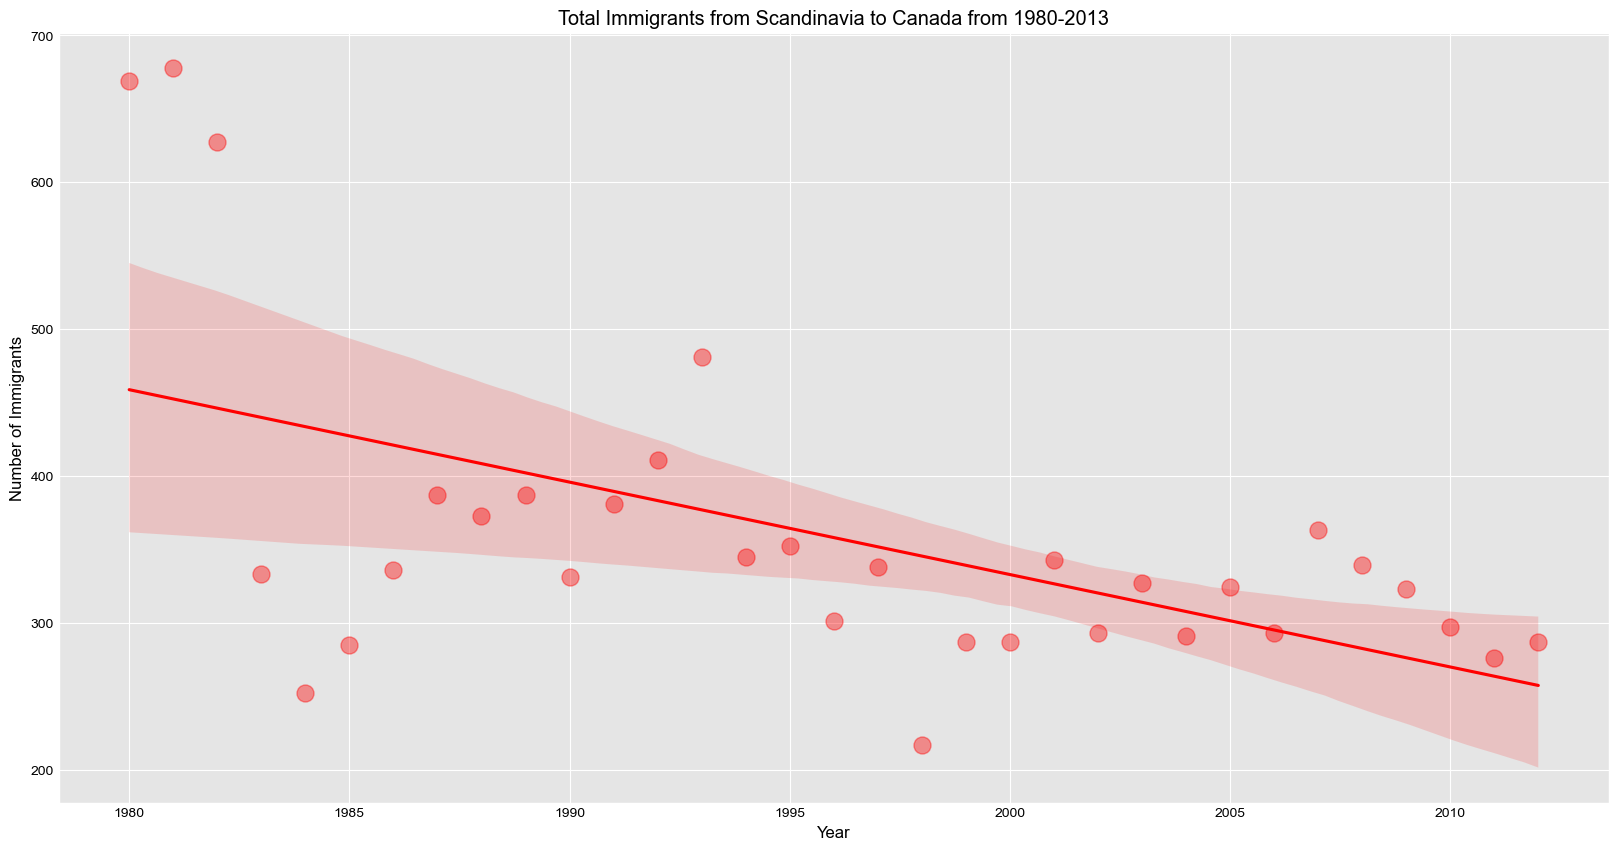

In [27]:
# Weak trend
canadiaReg1 = pd.DataFrame(canadia.loc[['Denmark','Norway','Sweden'],years].sum())
canadiaReg1.reset_index(inplace = True)
canadiaReg1.rename(columns = {'index':'year',0:'total'}, inplace = True)
canadiaReg1[['year','total']] = canadiaReg1[['year','total']].astype(int)

sb.regplot(x = 'year', y = 'total', data = canadiaReg1, color = 'Red', scatter_kws = {'s':150,'alpha':0.4})
plt.title('Total Immigrants from Scandinavia to Canada from 1980-2013', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.savefig('reg_weak.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Word Cloud

You might need to pip install wordcloud and pip install Pywaffle.  Follow the instruction from when you installed cyperpunk earlier.

Make sure to add the txt files from [here](https://github.com/codinglikeagirl42/DataVisualizationPython) to your data folder and remember the path is data/filename.txt. Try creating your own txt file to visualize.

In [30]:
pip install wordcloud

                                              0.0/152.1 kB ? eta -:--:--
     -----------------------------------    143.4/152.1 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 152.1/152.1 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install Pywaffle

                                              0.0/25.2 MB ? eta -:--:--
                                              0.4/25.2 MB 8.9 MB/s eta 0:00:03
     -                                        1.1/25.2 MB 13.6 MB/s eta 0:00:02
     --                                       1.9/25.2 MB 11.7 MB/s eta 0:00:02
     ---                                      2.5/25.2 MB 12.2 MB/s eta 0:00:02
     -----                                    3.3/25.2 MB 13.9 MB/s eta 0:00:02
     -----                                    3.4/25.2 MB 13.6 MB/s eta 0:00:02
     -----                                    3.4/25.2 MB 13.6 MB/s eta 0:00:02
     -----                                    3.4/25.2 MB 13.6 MB/s eta 0:00:02
     -----                                    3.8/25.2 MB 9.2 MB/s eta 0:00:03
     --------                                 5.1/25.2 MB 10.5 MB/s eta 0:00:02
     ---------                                6.2/25.2 MB 11.4 MB/s eta 0:00:02
     ----------                               6.9/

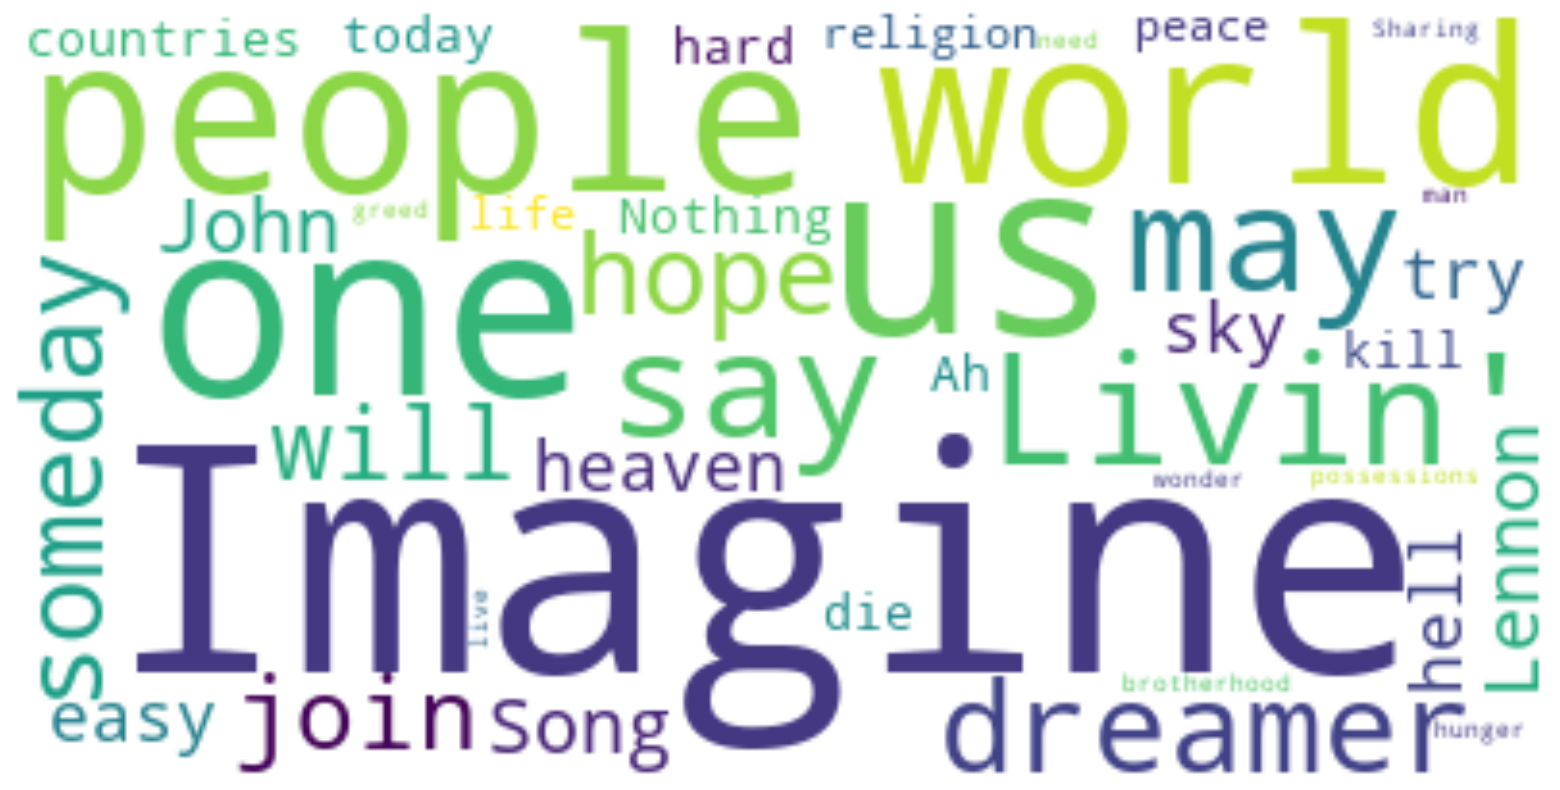

In [34]:
# word cloud
from wordcloud import WordCloud, STOPWORDS

text = open('C:\\Users\\Khazbin\\Desktop\\Data Analysis\\DataVisualizationPython-main\\Data\\Imagine.txt', 'r', encoding = 'utf-8').read()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white', max_words = 200, stopwords = stopwords)

wordcloud.generate(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Lollipop Chart

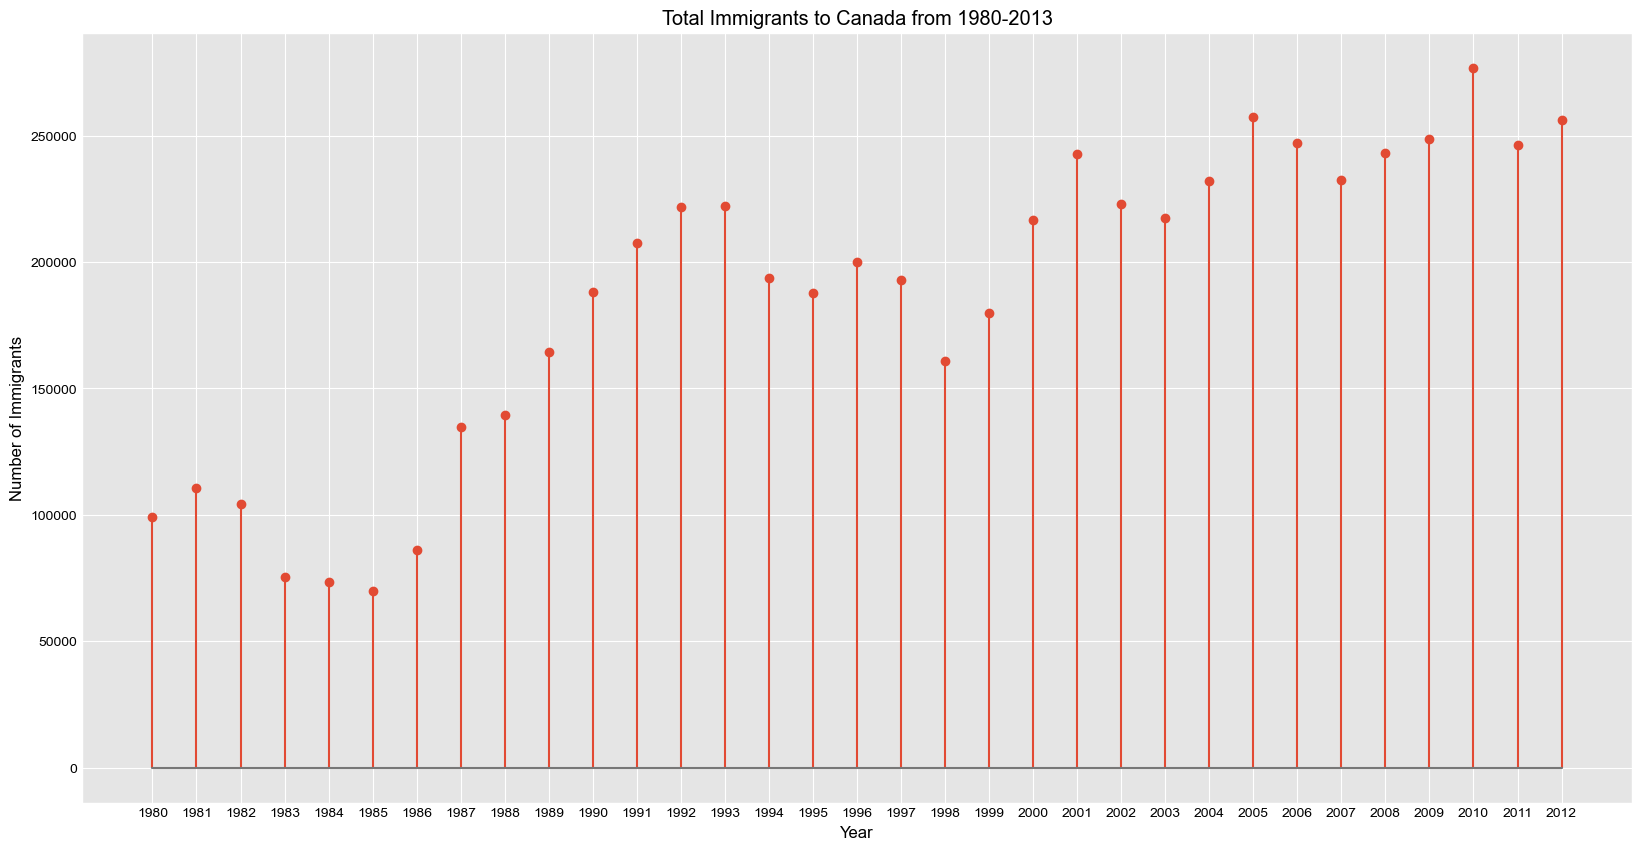

In [35]:
# Lollipop chart
plt.stem(canadiaTotal.index, canadiaTotal['total'])
plt.title('Total Immigrants to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('lollipop.png')

plt.show()

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>